In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pylab import rcParams
rcParams["font.family"] = "malgun Gothic" # malgun Gothic
rcParams["figure.figsize"] = 17,8

import warnings
warnings.filterwarnings("ignore")

In [40]:
gun = pd.read_csv("school_shooting.csv", encoding = "UTF-8")
gun

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.60,9,12,41.0,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.00,6,8,495.0,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.00,9,12,125.0,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.00,9,12,2007.0,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543.0,Suffolk County,25,25025,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,334,050002600867,Pine Bluff High School,500026.0,Pine Bluff School District,4/11/2022,2021-2022,2022,2:45 PM,Monday,...,34.219096,-92.010781,58.17,9,12,892.0,Jefferson County,5,5069,13.0
334,340,NaN,Edmund Burke School,NaN,NaN,4/22/2022,2021-2022,2022,3:18 PM,Friday,...,38.943041,-77.062093,NaN,6,12,NaN,District of Columbia,11,11001,11.0
335,338,262540000932,Aspen Ridge Elementary School,2625400.0,Nice Community School District,4/26/2022,2021-2022,2022,1:30 PM,Tuesday,...,46.480500,-87.728900,50.95,KG,8,264.0,Marquette County,26,26103,41.0
336,328,170993000709,Walt Disney Magnet School,1709930.0,City Of Chicago Sd 299,5/17/2022,2021-2022,2022,10:00 AM,Tuesday,...,41.956800,-87.646900,NaN,PK,8,NaN,Cook County,17,17031,11.0


In [41]:
cas = gun.groupby("year").sum()[["casualties"]]
cas["occurence"] = gun.groupby("year").count().uid


<function matplotlib.pyplot.show(close=None, block=None)>

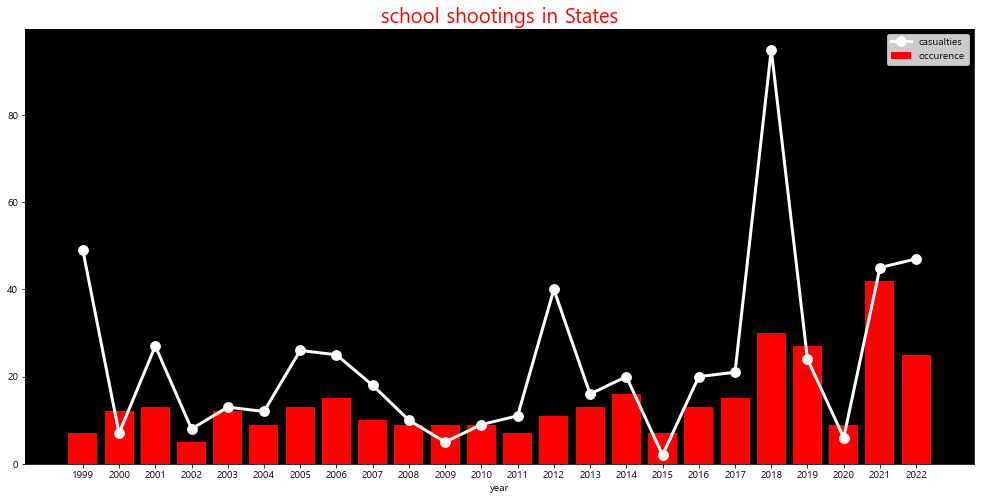

In [42]:
ax = plt.axes()
ax.set_facecolor("black")
plt.bar(cas.index, cas.occurence, color = "red", label = "occurence")
sns.lineplot(data = cas, x = cas.index, y = "casualties", color = "white", marker = "o", ms = 10, label = "casualties", lw = 3)
plt.title("school shootings in States", fontsize = 20, color = "red")
plt.ylabel("")
plt.xticks([n for n in range(1999, 2023)])
plt.legend() # Legend Size increase

plt.show

In [43]:
count = gun[["state", "uid"]].groupby("state").count()["uid"].sort_values()
count.index

Index(['Rhode Island', 'North Dakota', 'Iowa', 'New Hampshire',
       'Pennsylvania ', 'Idaho', 'Hawaii', 'South Dakota', 'Massachusetts',
       'Delaware', 'Montana', 'Nebraska', 'Alaska', 'Kansas', 'New Jersey',
       'Oklahoma', 'Utah', 'Arizona', 'Kentucky', 'Nevada', 'Missouri',
       'Wisconsin', 'District of Columbia', 'Connecticut', 'Arkansas',
       'Oregon', 'Minnesota', 'Indiana', 'New Mexico', 'Virginia',
       'Mississippi', 'Colorado', 'Maryland', 'Washington', 'New York',
       'South Carolina', 'Tennessee', 'Louisiana', 'Georgia', 'Ohio',
       'Pennsylvania', 'Alabama', 'Michigan', 'Illinois', 'Texas',
       'North Carolina', 'Florida', 'California'],
      dtype='object', name='state')

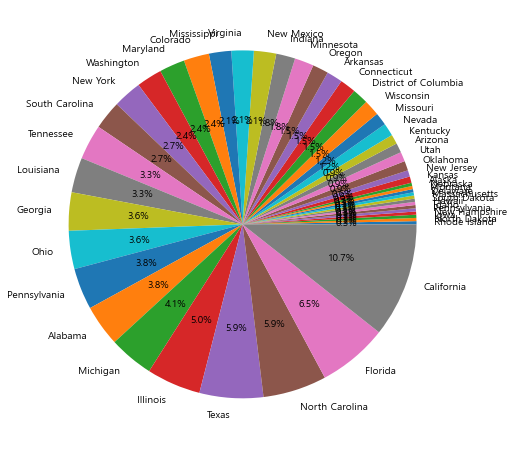

In [110]:
plt.pie(count, labels = count.index, autopct = "%.1f%%")
plt.show()

In [46]:
gun.groupby("state").count().index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Pennsylvania ', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington',
       'Wisconsin'],
      dtype='object', name='state')

<AxesSubplot:xlabel='Count', ylabel='age_shooter1'>

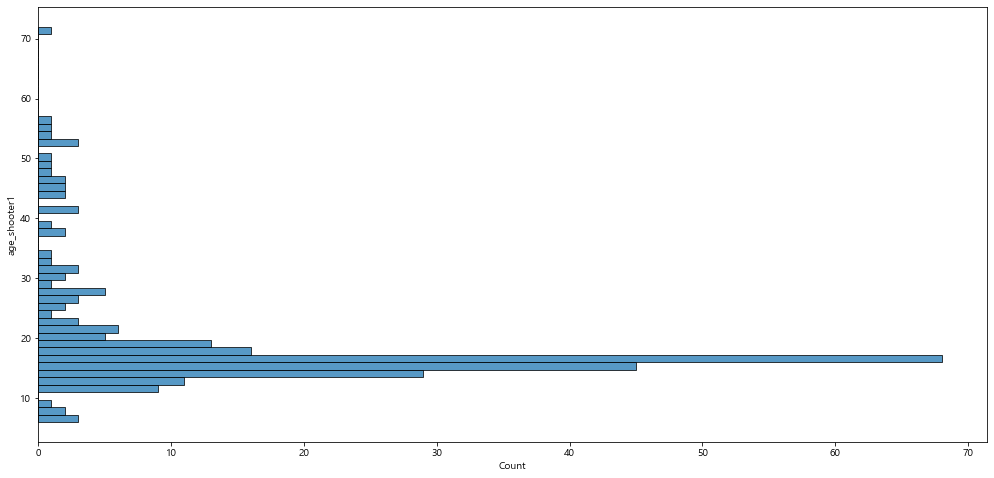

In [47]:
sns.histplot(data = gun, y = "age_shooter1")

In [48]:
gun.age_shooter1

bins = [-1, 19, 39, 59, 100]
labels = ["0 ~ 19세", "20 ~ 39세", "40 ~ 59세", "60세 이상"]

In [49]:
age = gun["age_shooter1"]
ages = pd.cut(age, bins, labels = labels)
gun["ranges"] = ages
gun["ranges"]

0       0 ~ 19세
1       0 ~ 19세
2       0 ~ 19세
3       0 ~ 19세
4           NaN
         ...   
333         NaN
334    20 ~ 39세
335         NaN
336     0 ~ 19세
337     0 ~ 19세
Name: ranges, Length: 338, dtype: category
Categories (4, object): ['0 ~ 19세' < '20 ~ 39세' < '40 ~ 59세' < '60세 이상']

In [50]:
age_rng = gun.groupby("ranges")["uid"].count()
age_rng

ranges
0 ~ 19세     197
20 ~ 39세     36
40 ~ 59세     18
60세 이상        1
Name: uid, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

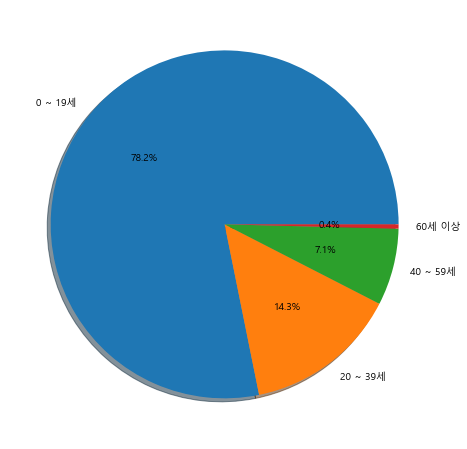

In [51]:
plt.pie(age_rng, labels = age_rng.index, autopct = "%.1f%%", shadow = True)
plt.show

In [107]:
gun.weapon = gun.weapon.fillna("None")
gun.loc[gun.weapon.str.contains("9mm gun"), "weapon"] = "Pistol"


In [108]:
gun.weapon.unique()

array(['Pistol', 'Unknown', 'Shotgun', 'Rifle'], dtype=object)

In [105]:
weapons = gun[["weapon","uid"]].groupby("weapon").count()
weapons.uid

weapon
9mm gun (type unknown)      1
Pistol                    202
Rifle                      20
Shotgun                    15
Unknown                   100
Name: uid, dtype: int64

In [ ]:
# handgun_list = ["handgun", "revolver", "Magnum", "pistol", "officer", "service",
#                 "semi-automatic", "Glock", "P238", "9mm gun", "40 caliber gun"]
# rifle_list = ["rifle", "AK-47", "AR", "M&P15"]
# shotgun_list = ["shotgun"]

# gun.weapon = gun.weapon.fillna("Unknown")
# gun.loc[gun.weapon.str.contains("|".join(handgun_list)), "weapon"] = "handgun"
# gun.loc[gun.weapon.str.contains("|".join(rifle_list)), "weapon"] = "rifle"
# gun.loc[gun.weapon.str.contains("|".join(shotgun_list)), "weapon"] = "shotgun"

<function matplotlib.pyplot.show(close=None, block=None)>

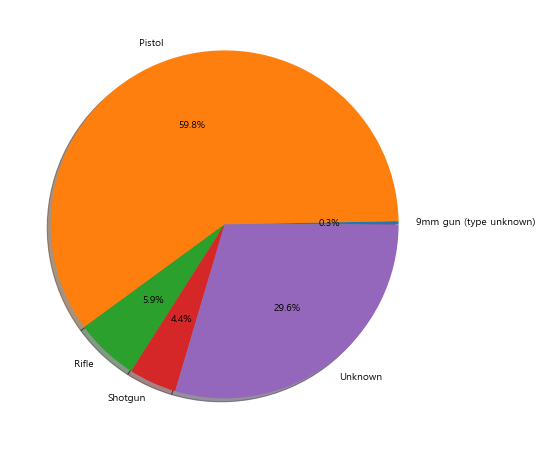

In [106]:
plt.pie(weapons.uid, labels = weapons.index, autopct = "%.1f%%", shadow = True)
plt.show